function getElementFeatures(el) {
    if (!el) return null;

    return {
        tagName: el.tagName.toLowerCase(),
        hasHref: el.hasAttribute("href"),
        hasOnClick: el.hasAttribute("onclick"),
        hasRoleButton: el.getAttribute("role") === "button",
        hasCursorPointer: window.getComputedStyle(el).cursor === "pointer",
        hasTabIndex: el.hasAttribute("tabindex"),
        isVisible: el.offsetParent !== null,
        width: el.getBoundingClientRect().width,
        height: el.getBoundingClientRect().height
    };
}

function collectData() {
    let elements = document.querySelectorAll("body > adev-root > div.docs-app-main-content > adev-playground > div > header > h1")

    
    let data = [];

    elements.forEach(el => {
        let features = getElementFeatures(el);
        if (features) {
            features.isClickable = el.tagName.match(/^(button|a|input)$/i) || features.hasHref || features.hasOnClick || features.hasRoleButton || features.hasCursorPointer ? 1 : 0;
            data.push(features);
        }
    });

    console.log(JSON.stringify(data, null, 2)); // Copy this output and save it
}

collectData();

In [26]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



In [27]:
# Load the collected data
with open("clickable_data.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,tagName,hasHref,hasOnClick,hasRoleButton,hasCursorPointer,hasTabIndex,isVisible,width,height,isClickable
0,html,False,False,False,False,False,False,795.333374,4560.239746,0
1,head,False,False,False,False,False,False,0.000000,0.000000,0
2,script,False,False,False,False,False,False,0.000000,0.000000,0
3,script,False,False,False,False,False,False,0.000000,0.000000,0
4,link,True,False,False,False,False,False,0.000000,0.000000,1


In [28]:

# Features and target
X = df.drop(columns=["isClickable", "tagName"])  # Drop non-numeric columns
y = df["isClickable"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth for better performance
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")



Decision Tree Model Accuracy: 0.99


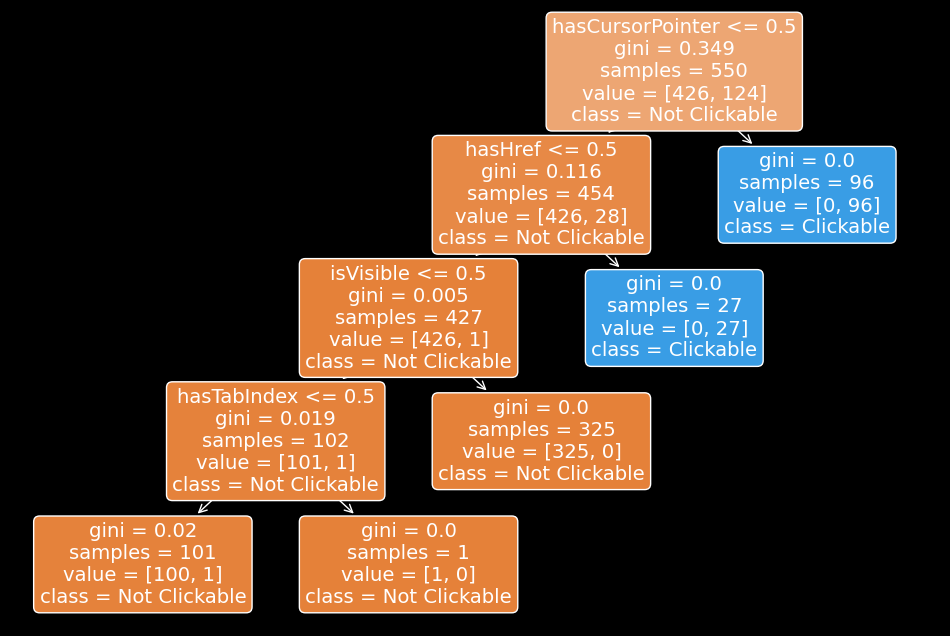

In [29]:


# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=["Not Clickable", "Clickable"], filled=True, rounded=True)
plt.show()

In [30]:
dff = pd.DataFrame([
  {
    "tagName": "qui-ng-form-field-wrapper",
    "hasHref": 'false',
    "hasOnClick": 'false',
    "hasRoleButton": 'false',
    "hasCursorPointer": 'false',
    "hasTabIndex": 'false',
    "isVisible": 'true',
    "width": 256,
    "height": 80,
    "isClickable": 0
  }
])
# print(df.dtypes)

dff = dff.astype(df.dtypes)
# print(dff.dtypes)
filtered = dff.drop(columns=["tagName","isClickable"])
filtered.head()
val = model.predict(filtered)
print(val)

[1]


In [32]:
json = [
  {
    "tagName": "button",
    "hasHref": False,
    "hasOnClick": False,
    "hasRoleButton": True,
    "hasCursorPointer": True,
    "hasTabIndex": False,
    "isVisible": True,
    "width": 200,
    "height": 38.13541793823242,
    "isClickable": 1
  }
]

dff = pd.DataFrame(json)


dff = dff.astype(df.dtypes)
# print(dff.dtypes)
filtered = dff.drop(columns=["tagName","isClickable"])
filtered.head()
val = model.predict(filtered)
print(val)

[1]


In [33]:
json = [
  {
    "tagName": "h1",
    "hasHref": False,
    "hasOnClick": False,
    "hasRoleButton": False,
    "hasCursorPointer": False,
    "hasTabIndex": True,
    "isVisible": True,
    "width": 275.2395935058594,
    "height": 39.333335876464844,
    "isClickable": 0
  }
]
dff = pd.DataFrame(json)


dff = dff.astype(df.dtypes)
# print(dff.dtypes)
filtered = dff.drop(columns=["tagName","isClickable"])
filtered.head()
val = model.predict(filtered)
print(val)

[0]
